In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np


In [2]:
torch.__version__

'2.6.0+cu126'

In [3]:
print(torch.version.cuda)

12.6


In [4]:
torch.cuda.is_available()

True

In [5]:

# Check CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")



Using device: cuda


In [6]:

# Hyperparameters
batch_size = 128
latent_dim = 100
lr = 0.0002
epochs = 50



In [7]:

# Load MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True,
    transform=transform
)

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size,
    shuffle=True
)



100.0%
100.0%
100.0%
100.0%


In [8]:


# Generator Model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    
    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)


In [9]:

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

# Initialize models
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()



[Epoch 1/50] D_loss: 0.1744 G_loss: 9.1969
[Epoch 2/50] D_loss: 0.0385 G_loss: 11.9452
[Epoch 3/50] D_loss: 0.0296 G_loss: 11.9141
[Epoch 4/50] D_loss: 0.2590 G_loss: 13.2712
[Epoch 5/50] D_loss: 0.1518 G_loss: 10.4983
[Epoch 6/50] D_loss: 0.1419 G_loss: 9.9796
[Epoch 7/50] D_loss: 0.3146 G_loss: 6.0372
[Epoch 8/50] D_loss: 0.2818 G_loss: 7.1675
[Epoch 9/50] D_loss: 0.3961 G_loss: 3.6258
[Epoch 10/50] D_loss: 0.6428 G_loss: 3.7569


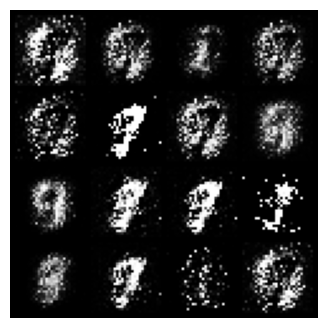

[Epoch 11/50] D_loss: 0.3458 G_loss: 4.2649
[Epoch 12/50] D_loss: 0.5685 G_loss: 2.7761
[Epoch 13/50] D_loss: 0.8416 G_loss: 1.5838
[Epoch 14/50] D_loss: 0.7883 G_loss: 1.8918
[Epoch 15/50] D_loss: 0.7531 G_loss: 1.3471
[Epoch 16/50] D_loss: 0.7154 G_loss: 2.4478
[Epoch 17/50] D_loss: 0.7269 G_loss: 2.3387
[Epoch 18/50] D_loss: 0.8353 G_loss: 2.2613
[Epoch 19/50] D_loss: 0.8457 G_loss: 1.6628
[Epoch 20/50] D_loss: 1.0624 G_loss: 1.6238


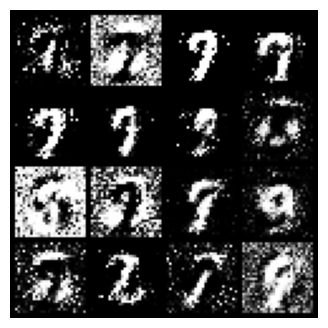

[Epoch 21/50] D_loss: 0.9092 G_loss: 1.5712
[Epoch 22/50] D_loss: 0.9740 G_loss: 1.6801
[Epoch 23/50] D_loss: 0.8292 G_loss: 1.5851
[Epoch 24/50] D_loss: 0.8007 G_loss: 1.5096
[Epoch 25/50] D_loss: 0.8310 G_loss: 1.7727
[Epoch 26/50] D_loss: 1.0201 G_loss: 1.2510
[Epoch 27/50] D_loss: 0.9367 G_loss: 1.3428
[Epoch 28/50] D_loss: 0.8640 G_loss: 1.7603
[Epoch 29/50] D_loss: 0.7525 G_loss: 2.6253
[Epoch 30/50] D_loss: 1.0353 G_loss: 1.5835


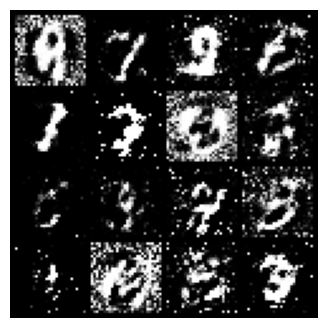

[Epoch 31/50] D_loss: 0.9489 G_loss: 1.3129
[Epoch 32/50] D_loss: 1.1055 G_loss: 1.7477
[Epoch 33/50] D_loss: 1.0994 G_loss: 1.4336
[Epoch 34/50] D_loss: 1.0313 G_loss: 1.5258
[Epoch 35/50] D_loss: 0.9304 G_loss: 1.3780
[Epoch 36/50] D_loss: 1.0231 G_loss: 1.2508
[Epoch 37/50] D_loss: 1.0131 G_loss: 1.1681
[Epoch 38/50] D_loss: 1.0773 G_loss: 1.4021
[Epoch 39/50] D_loss: 1.0516 G_loss: 1.2063
[Epoch 40/50] D_loss: 1.0207 G_loss: 1.3845


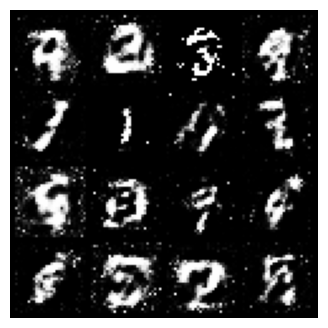

[Epoch 41/50] D_loss: 1.3090 G_loss: 1.1689
[Epoch 42/50] D_loss: 0.9654 G_loss: 1.4728
[Epoch 43/50] D_loss: 1.0589 G_loss: 1.2750
[Epoch 44/50] D_loss: 1.1479 G_loss: 1.1192
[Epoch 45/50] D_loss: 1.0698 G_loss: 1.3703
[Epoch 46/50] D_loss: 1.1448 G_loss: 1.0388
[Epoch 47/50] D_loss: 1.0725 G_loss: 1.1313
[Epoch 48/50] D_loss: 1.1299 G_loss: 1.3002
[Epoch 49/50] D_loss: 1.1459 G_loss: 1.0937
[Epoch 50/50] D_loss: 1.1078 G_loss: 1.2281


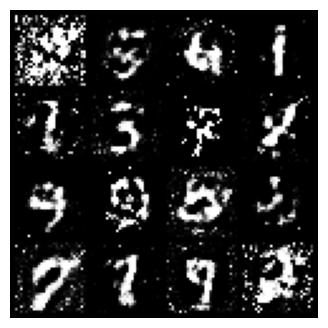

In [10]:


# Training loop
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        # Configure input
        real_imgs = imgs.to(device)
        
        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        
        # Real images
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        real_output = discriminator(real_imgs)
        d_loss_real = criterion(real_output, real_labels)
        
        # Fake images
        z = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = generator(z)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)
        fake_output = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(fake_output, fake_labels)
        
        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()
        
        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()
        
        # Generate fake images
        gen_labels = torch.ones(imgs.size(0), 1).to(device)
        gen_output = discriminator(fake_imgs)
        g_loss = criterion(gen_output, gen_labels)
        
        g_loss.backward()
        optimizer_G.step()
        
    # Print progress
    print(f"[Epoch {epoch+1}/{epochs}] D_loss: {d_loss.item():.4f} G_loss: {g_loss.item():.4f}")
    
    # Generate sample images
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            test_z = torch.randn(16, latent_dim).to(device)
            generated = generator(test_z).cpu()
            plt.figure(figsize=(4,4))
            plt.imshow(np.transpose(make_grid(generated, nrow=4, padding=2, normalize=True),(1,2,0)))
            plt.axis('off')
            plt.show()

# Save models
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

Discriminator Accuracy on Real: 0.6562
Discriminator Accuracy on Fake: 0.6860
Total Discriminator Accuracy: 0.6711


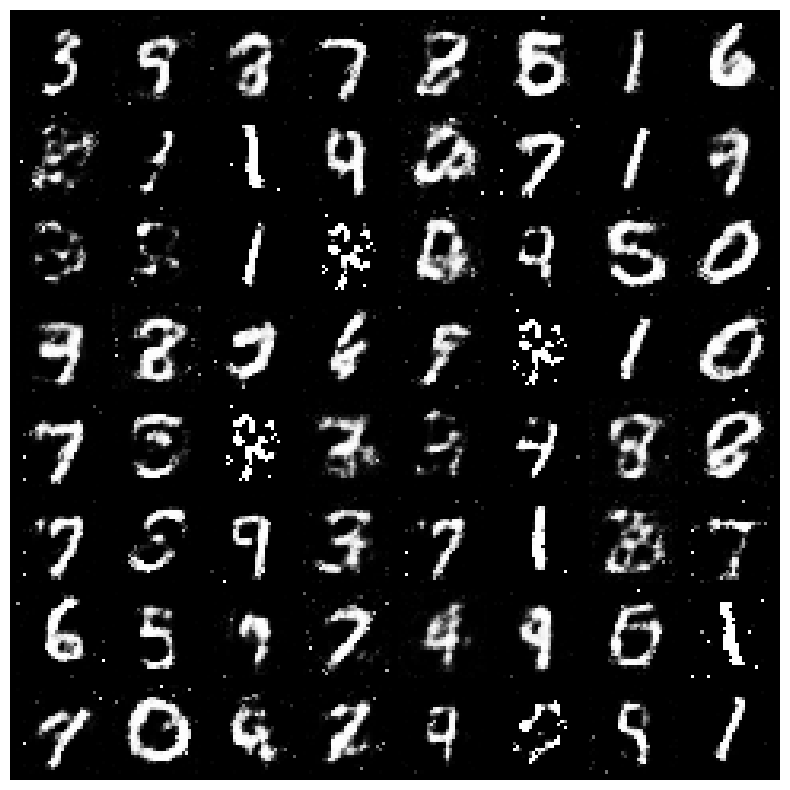

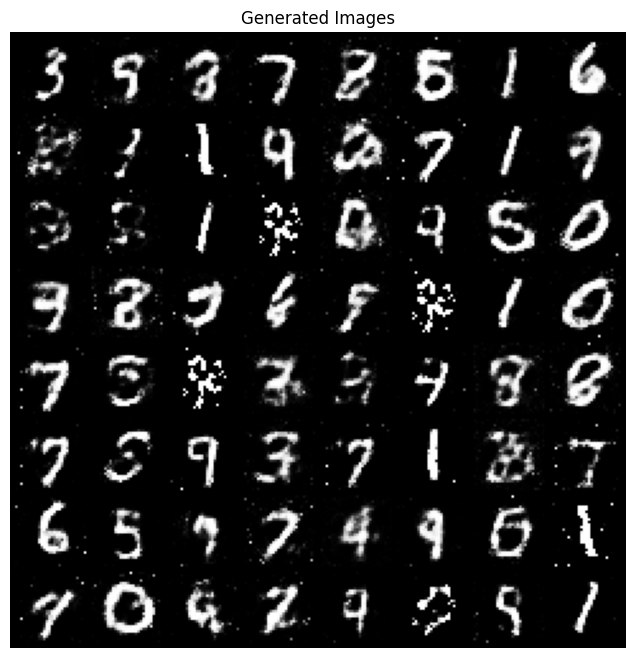

In [13]:
# Evaluation function
def show_images(images, title="Generated Images"):
    plt.figure(figsize=(8,8))
    plt.title(title)
    plt.axis('off')
    # Use .clamp to handle any remaining outliers
    grid = make_grid(images.clamp(-1,1), nrow=8, padding=2, normalize=True)
    plt.imshow(np.transpose(grid.cpu().numpy(), (1,2,0)))
    plt.show()

def evaluate_gan(generator, latent_dim, n_samples=1000):
    generator.eval()
    with torch.no_grad():
        # Generate fake images
        z = torch.randn(n_samples, latent_dim).to(device)
        fake_images = generator(z)
        
        # Calculate discriminator outputs
        real_output = discriminator(real_images)
        fake_output = discriminator(fake_images)
        
        # Calculate discriminator accuracy
        real_acc = (real_output >= 0.5).float().mean()
        fake_acc = (fake_output < 0.5).float().mean()
        total_acc = (real_acc + fake_acc) / 2
        
        test_z = torch.randn(64, latent_dim).to(device)
        generated = generator(test_z).cpu()
        
    print(f"Discriminator Accuracy on Real: {real_acc.item():.4f}")
    print(f"Discriminator Accuracy on Fake: {fake_acc.item():.4f}")
    print(f"Total Discriminator Accuracy: {total_acc.item():.4f}")
    
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(np.transpose(make_grid(generated, padding=2, normalize=True, nrow=8),(1,2,0)))
    plt.show()
    
    show_images(generated)
    
    

# Load some real images for evaluation
real_images, _ = next(iter(train_loader))
real_images = real_images[:1000].to(device)

# Run evaluation
evaluate_gan(generator, latent_dim)